In [6]:

import os
import sys
import importlib
import copy
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

from tools_pattern import get_eucledean_dist

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'distribution_123share_bouton_210519_dist'

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )

import compress_pickle

# fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
#                                    'mf_grc_model/input_graph_210407_all.gz')
fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/' \
#          'gen_db/mf_grc/input_graph_210519_all.gz')
         'gen_db/mf_grc/input_graph_210520_all_100_2.gz')
input_graph = compress_pickle.load(fname)

mf_size_map = compress_pickle.load('../mf_combination_representation/mf_bouton_210519_compare_dist_mf_size_map.gz')

# z_min = 19800
# z_max = 29800
z_min = 19800
z_max = 29800
# GrCs are fully reconstructed and proofread from 90k to 150k
x_min = 360*1000
x_max = 520*1000

grc_ids = set()
mf_ids = set()

grc_mfs = list()

def get_prob(in_graph, unique_count=False, count_within_box=True, return_counted=False):
    n_common_pairs = 0
    processed = set()
    total_n_pairs = 0
    hist = defaultdict(int)
    n = 0
    counted_grcs = 0
    for grc_i_id in in_graph.grcs:
        n += 1
        grc_i = in_graph.grcs[grc_i_id]
        x, y, z = grc_i.soma_loc
        if count_within_box:
            if x < x_min or x > x_max:
                continue
            if z < z_min or z > z_max:
                continue
        counted_grcs += 1
        grc_ids.add(grc_i_id)
        rosettes_i = set([mf[1] for mf in grc_i.edges])
        grc_mfs.append(list(rosettes_i))
        for r in rosettes_i:
            mf_ids.add(r)
    return grc_mfs

get_prob(input_observed, count_within_box=True, return_counted=True)

print(grc_mfs)

[[(462279, 472330, 26622), (497826, 446604, 24178), (505960, 451338, 32979), (481350, 458912, 33406), (488358, 464179, 38249)], [(465239, 418836, 13140), (498900, 438259, 25822), (465780, 445264, 22480), (456595, 465648, 21910), (488358, 464179, 38249)], [(453391, 452305, 14855), (482584, 476290, 15214), (449236, 475669, 12717), (488358, 464179, 38249)], [(452086, 453471, 34870), (487889, 463277, 21124), (462279, 472330, 26622), (488358, 464179, 38249)], [(479351, 461551, 17523), (497826, 446604, 24178), (481350, 458912, 33406), (468090, 435256, 28124), (488358, 464179, 38249)], [(517528, 467883, 19972), (521024, 452851, 7702), (485240, 435685, 28983), (488358, 464179, 38249)], [(358851, 450949, 28053), (385147, 439989, 27083), (321643, 418897, 13474), (337532, 425725, 30185), (379441, 442302, 29766)], [(357473, 428086, 15046), (359992, 414626, 28517)], [(358891, 412603, 22461), (381377, 437983, 19745), (399922, 424594, 33184), (395855, 414280, 25845), (381460, 430297, 15432), (381502,

Height: 4, Aspect: 2


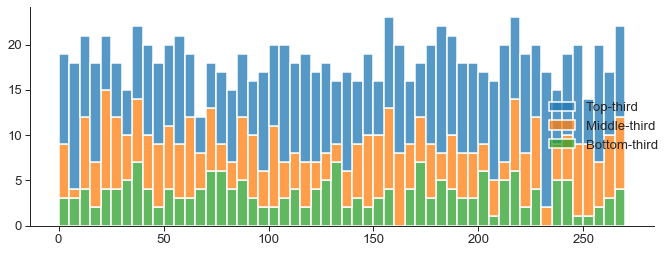

In [81]:
grc_mfs_size = []
for mfs in grc_mfs:
    sizes = []
    for mf in mfs:
        if mf in mf_size_map:
            sizes.append(mf_size_map[mf])
    grc_mfs_size.append(sizes)

import random
random.seed(4)
random.shuffle(grc_mfs_size)

def to_category(s):
    if s < 12:
        c = 'Bottom-third'
    elif s < 18:
        c = 'Middle-third'
    else:
        c = 'Top-third'
    return c

grc_mfs_size = [[to_category(s) for s in k] for k in grc_mfs_size]

# def my_sort(x):
#     num_lows = x.count('Bottom-third')
#     num_meds = x.count('Middle-third')
#     num_highs = x.count('Top-third')
#     return num_lows + num_meds*2 + num_highs*3
# grc_mfs_size = sorted(grc_mfs_size, key=lambda x: my_sort(x))

mpd = MyPlotData()
for i, mfs in enumerate(grc_mfs_size):
    for mf in sorted(mfs):
#         c = to_category(mf)
        mpd.add_data_point(
            grc_id=i,
#             mf=mf,
            mf_class=mf,
        )
        
# def custom_legend_fn(plt):
# #     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
#     plt.legend(loc='upper right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='grc_id',
#     y='mf',
    hue='mf_class',
#     hue_order=['Bottom-third', 'Middle-third', 'Top-third'],
    hue_order=['Top-third', 'Middle-third', 'Bottom-third'],
    
    kind='hist',
    binwidth=5,
    
#     kind='kde',
    multiple='stack',
    context='paper',
#     linewidth=2.5,
#     kde=True,
#     stat='density',
    height=4,
    aspect=2,
#     y_axis_label='# of 2-share GrC partners',
#     x_axis_label='Sorted GrCs',
#     save_filename=f'{script_n}_line.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    )

In [1]:
grc_mfs_size = []
for mfs in grc_mfs:
    sizes = []
    for mf in mfs:
        if mf in mf_size_map:
            sizes.append(mf_size_map[mf])
    grc_mfs_size.append(sizes)

import random
random.seed(4)
random.shuffle(grc_mfs_size)

def to_category(s):
    if s < 12:
        c = 'Bottom-third'
    elif s < 18:
        c = 'Middle-third'
    else:
        c = 'Top-third'
    return c

grc_mfs_size = [[to_category(s) for s in k] for k in grc_mfs_size]

# def my_sort(x):
#     num_lows = x.count('Bottom-third')
#     num_meds = x.count('Middle-third')
#     num_highs = x.count('Top-third')
#     return num_lows + num_meds*2 + num_highs*3
# grc_mfs_size = sorted(grc_mfs_size, key=lambda x: my_sort(x))

mpd = MyPlotData()
for i, mfs in enumerate(grc_mfs_size):
    for mf in sorted(mfs):
#         c = to_category(mf)
        mpd.add_data_point(
            grc_id=i,
#             mf=mf,
            mf_class=mf,
        )
        
# def custom_legend_fn(plt):
# #     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
#     plt.legend(loc='upper right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='grc_id',
#     y='mf',
    hue='mf_class',
#     hue_order=['Bottom-third', 'Middle-third', 'Top-third'],
    hue_order=['Top-third', 'Middle-third', 'Bottom-third'],
    
    kind='hist',
    binwidth=5,
    
#     kind='kde',
    multiple='stack',
    context='paper',
#     linewidth=2.5,
#     kde=True,
#     stat='density',
    height=4,
    aspect=2,
#     y_axis_label='# of 2-share GrC partners',
#     x_axis_label='Sorted GrCs',
#     save_filename=f'{script_n}_line.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    )

NameError: name 'grc_mfs' is not defined

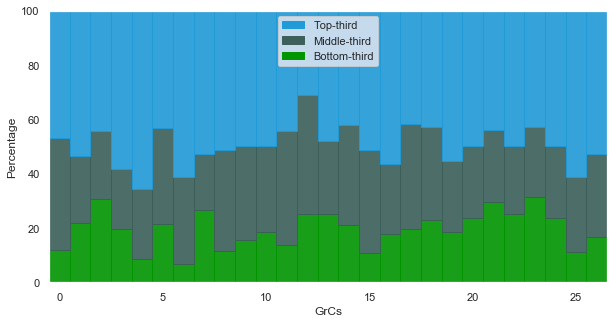

In [165]:

def to_category(s):
    if s < 12: c = 'low'
    elif s < 18: c = 'mid'
    else: c = 'hi'
    return c

grc_mfs_copy = copy.copy(grc_mfs)
import random
random.seed(1)
random.shuffle(grc_mfs_copy)
grc_mfs_size = []
i = 0
mpd = MyPlotData()
every=10

sizes = defaultdict(int)
s = 0
for mfs in grc_mfs_copy:
    for mf in mfs:
        if mf in mf_size_map:
            mf_size = mf_size_map[mf]
            cat = to_category(mf_size)
            sizes[cat] += 1
            s += 1
    if s:
        # normalize size
#         for k, v in sizes.items():
#             sizes[k] = v/s
        i += 1
        if i%every == (every-1):
            mpd.add_data_point(
#                 grc_id=int(i/every),
                grc_id=i,
                low=sizes['low'],
                mid=sizes['mid'],
                hi=sizes['hi'],
            )
            s = 0
            sizes = defaultdict(int)
# mpd.data
colors = ['#019600', '#3C5F5A', '#219AD8']
plot_stacked_bar(mpd, colors=colors)

defaultdict(<class 'int'>, {'mid': 312, 'hi': 548, 'low': 135})
270
353


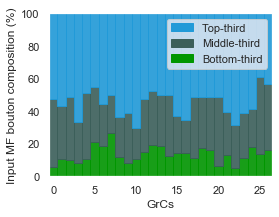

In [202]:
import random

mf_sizes = [(k, v) for k, v in mf_size_map.items()]
random.shuffle(mf_sizes)
mf_sizes = sorted(mf_sizes, key=lambda x: x[1])
# print(mf_sizes); asdf
mf_sizes_order = [k for k,v in mf_sizes]
# print(len(mf_sizes_order))

grc_mfs_copy = copy.copy(grc_mfs)
random.seed(0)
random.shuffle(grc_mfs_copy)

def to_category(loc):
    i = mf_sizes_order.index(loc)
#     print(i)
    if i < (len(mf_sizes_order)/3): return 'low'
    elif i < (len(mf_sizes_order)*2/3): return 'mid'
    else: return 'hi'

grc_mfs_size = []
i = 0
mpd = MyPlotData()
every=10

sizes = defaultdict(int)
total_sizes = defaultdict(int)
s = 0
for mfs in grc_mfs_copy:
    for mf in mfs:
        if mf in mf_sizes_order:
            cat = to_category(mf)
            sizes[cat] += 1
            total_sizes[cat] += 1
            s += 1
#     print(sizes)
    if s:
        # normalize size
#         for k, v in sizes.items():
#             sizes[k] = v/s
        i += 1
        if i%every == (every-1):
            mpd.add_data_point(
#                 grc_id=int(i/every),
                grc_id=i,
                low=sizes['low'],
                mid=sizes['mid'],
                hi=sizes['hi'],
            )
            s = 0
            sizes = defaultdict(int)
# mpd.data
colors = ['#019600', '#3C5F5A', '#219AD8']
plot_stacked_bar(mpd, colors=colors)
print(total_sizes)
print(len(grc_mfs_copy))
print(len(mf_sizes_order))

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stacked_bar(mpd, colors):
    df = mpd.to_dataframe()
    # Create a figure with a single subplot
    f, ax = plt.subplots(1, figsize=(4,3))
    # Set bar width at 1
    bar_width = 1
    # positions of the left bar-boundaries
    bar_l = [i for i in range(len(df['low']))] 
    # positions of the x-axis ticks (center of the bars as bar labels)
    tick_pos = [i+(bar_width/2) for i in bar_l] 
    # Create the total score for each participant
    totals = [i+j+k for i,j,k in zip(df['low'], df['mid'], df['hi'])]
    # Create the percentage of the total score the pre_score value for each participant was
    pre_rel = [i / j * 100 for  i,j in zip(df['low'], totals)]
    # Create the percentage of the total score the mid_score value for each participant was
    mid_rel = [i / j * 100 for  i,j in zip(df['mid'], totals)]
    # Create the percentage of the total score the post_score value for each participant was
    post_rel = [i / j * 100 for  i,j in zip(df['hi'], totals)]

    # Create a bar chart in position bar_1
    ax.bar(bar_l, 
           # using pre_rel data
           pre_rel, 
           # labeled 
           label='Pre Score', 
           # with alpha
           alpha=0.9, 
           # with color
           color=colors[0],
           # with bar width
           width=bar_width,
           # with border color
           edgecolor=colors[0],
           )
    # Create a bar chart in position bar_1
    ax.bar(bar_l, 
           # using mid_rel data
           mid_rel, 
           # with pre_rel
           bottom=pre_rel, 
           # labeled 
           label='Mid Score', 
           # with alpha
           alpha=0.9, 
           # with color
           color=colors[1],
           # with bar width
           width=bar_width,
           # with border color
           edgecolor=colors[1],
           )
    # Create a bar chart in position bar_1
    ax.bar(bar_l, 
           # using post_rel data
           post_rel, 
           # with pre_rel and mid_rel on bottom
           bottom=[i+j for i,j in zip(pre_rel, mid_rel)], 
           # labeled 
           label='Post Score',
           # with alpha
           alpha=0.9, 
           # with color
           color=colors[2],
           # with bar width
           width=bar_width,
           # with border color
           edgecolor=colors[2],
           )
    # Set the ticks to be first names
    # plt.xticks(tick_pos, df['first_name'])
    ax.set_ylabel("Input MF bouton composition (%)")
    ax.set_xlabel("GrCs")
    # Let the borders of the graphic
    plt.xlim([min(tick_pos)-bar_width, max(tick_pos)])
    plt.ylim(0, 100)
    # rotate axis labels
    # plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    # shot plot
#     plt.show()
    ax.grid(False)
#     plt.axis('off')
#     plt.grid(b=None)
#     ax.set_facecolor((1,1,1))
    # add legend
    top_bar = mpatches.Patch(color=colors[2], label='Top-third')
    mid_bar = mpatches.Patch(color=colors[1], label='Middle-third')
    bottom_bar = mpatches.Patch(color=colors[0], label='Bottom-third')
    plt.legend(handles=[top_bar, mid_bar, bottom_bar], loc='upper right', fontsize=11)
    # save
    plt.savefig(f'{script_n}_fig.svg')

In [ ]:

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='grc_id',
#     y='mf',
    hue='mf',
#     kind='kde',
    multiple='stack',
    context='paper',
#     linewidth=2.5,
#     kde=True,
#     stat='density',
    height=4,
    aspect=2,
#     y_axis_label='# of 2-share GrC partners',
#     x_axis_label='Sorted GrCs',
#     save_filename=f'{script_n}_line.svg',
    show=True,
    )

Height: 3, Aspect: 1.3333333333333333


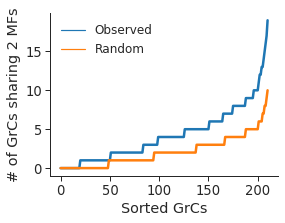

In [9]:

mpd_all = MyPlotData()
mpd_all.append(mpd_count)
mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'model', 'Random')
mpd_all.append(mpd_random)

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='top left', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_all,
    x='i',
    y='count',
    hue='model',
    context='paper',
    linewidth=2.5,
#     kde=True,
#     stat='density',
    height=3,
    width=4,
    y_axis_label='# of GrCs sharing 2 MFs',
    x_axis_label='Sorted GrCs',
    save_filename=f'{script_n}_observed_vs_random.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 4, Aspect: 1.5


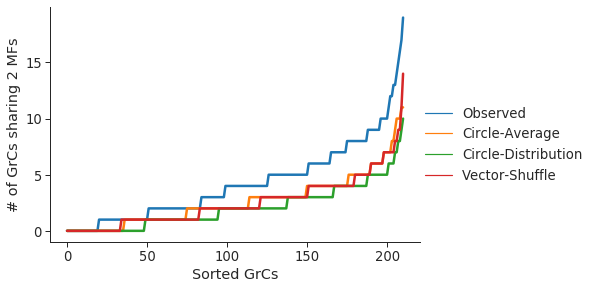

In [20]:

mpd_all = MyPlotData()
mpd_all.append(mpd_count)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'model', 'Circle-Average')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'model', 'Circle-Distribution')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
#     'distribution_123share_bouton_210519_random_edge_global_15000_X_420000_540000_Z_19800_29800.gz'
    'distribution_123share_bouton_210519_random_edge_global_10000_X_420000_540000_Z_19800_29800.gz'
        ).add_key_value('model', 'Vector-Shuffle')
mpd_all.append(mpd_random)

# def custom_legend_fn(plt):
# #     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
#     plt.legend(loc='top left', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_all,
    x='i',
    y='count',
    hue='model',
    context='paper',
    linewidth=2.5,
#     kde=True,
#     stat='density',
    height=4,
    width=6,
    y_axis_label='# of GrCs sharing 2 MFs',
    x_axis_label='Sorted GrCs',
    save_filename=f'{script_n}_observed_vs_random_supp.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.5


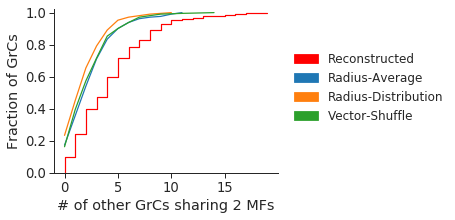

In [29]:

mpd_all = MyPlotData()
mpd_all.append(mpd_count)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='2shares', hist_val='count')
mpd_random.add_key_value('model', 'Radius-Average')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='2shares', hist_val='count')
mpd_random.add_key_value('model', 'Radius-Distribution')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_edge_global_10000_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='2shares', hist_val='count')
mpd_random.add_key_value('model', 'Vector-Shuffle')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

mpd_count_observed = copy.copy(mpd_count)
mpd_count_observed.add_key_value('model', 'Reconstructed')
import matplotlib.pyplot as plt
plt.subplots(figsize=(4, 3))
import seaborn as sns
ax = sns.ecdfplot(data=mpd_count_observed.to_dataframe(), x="count", palette=palette, hue='model')

importlib.reload(my_plot); my_plot.my_lineplot(
    mpd_all,
    x='2shares',
    y='count_cdf',
    hue='model',
    hue_order=['Radius-Average', 'Radius-Distribution', 'Vector-Shuffle'],
    context='paper',
#     palette=palette,
    linewidth=1.25,
    ylim=[0, 1.02],
    height=3,
    width=4.5,
#     aspect=2,
    y_axis_label='Fraction of GrCs',
    x_axis_label='# of other GrCs sharing 2 MFs',
    save_filename=f'{script_n}_supp_circle_cdf.svg',
    no_show=True,
    )

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Reconstructed')
patch0 = mpatches.Patch(color=sns.color_palette()[0], label='Radius-Average')
patch1 = mpatches.Patch(color=sns.color_palette()[1], label='Radius-Distribution')
patch2 = mpatches.Patch(color=sns.color_palette()[2], label='Vector-Shuffle')
# plt.legend(handles=[red_patch, black_patch])
plt.legend(frameon=False, fontsize=12, handles=[red_patch, patch0, patch1, patch2],
          bbox_to_anchor=(1.025, .8),)
# plt.legend(labels=['legendEntry1', 'legendEntry2'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(f'{script_n}_supp_cdf.svg', bbox_inches='tight', transparent=True)
plt.show()
plt.close()


Height: 4, Aspect: 1.5


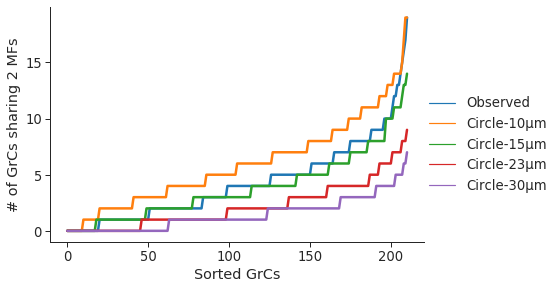

In [22]:

mpd_all = MyPlotData()
mpd_all.append(mpd_count)

# mpd_random = compress_pickle.load(
#     'distribution_123share_bouton_210519_random_circle_const_15000_X_420000_540000_Z_19800_29800.gz'
# #     'distribution_123share_bouton_210519_random_circle_const_15000_margin_10000_X_420000_540000_Z_19800_29800.gz'
# #     'distribution_123share_bouton_210519_random_edge_global_15000_X_420000_540000_Z_19800_29800.gz'
# #     'distribution_123share_bouton_210519_random_edge_global_15000_X_420000_540000_Z_19800_29800.gz'
# #     'distribution_123share_bouton_210519_random_edge_global_15000_X_420000_540000_Z_19800_29800.gz'
# #     'distribution_123share_bouton_210519_random_edge_global_15000_X_420000_540000_Z_19800_29800.gz'
#         ).add_key_value('model', 'Circle-15k')
# mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_const_15000_margin_10000_X_420000_540000_Z_19800_29800.gz'
        ).add_key_value('model', 'Circle-15µm')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_const_10000_margin_10000_X_420000_540000_Z_19800_29800.gz'
        ).add_key_value('model', 'Circle-10µm')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_const_23000_margin_10000_X_420000_540000_Z_19800_29800.gz'
        ).add_key_value('model', 'Circle-23µm')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_const_30000_margin_10000_X_420000_540000_Z_19800_29800.gz'
        ).add_key_value('model', 'Circle-30µm')
mpd_all.append(mpd_random)

# def custom_legend_fn(plt):
# #     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
#     plt.legend(loc='top left', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_all,
    x='i',
    y='count',
    hue='model',
    hue_order=['Observed', 'Circle-10µm', 'Circle-15µm', 'Circle-23µm', 'Circle-30µm', ],
    context='paper',
    linewidth=2.5,
#     kde=True,
#     stat='density',
    height=4,
    width=6,
    y_axis_label='# of GrCs sharing 2 MFs',
    x_axis_label='Sorted GrCs',
    save_filename=f'{script_n}_observed_vs_random_supp_circle.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.5


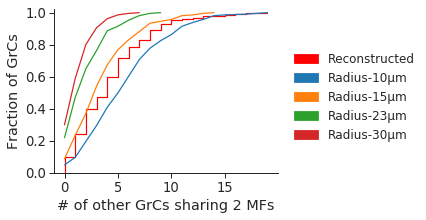

In [28]:

mpd_all = MyPlotData()
mpd_all.append(mpd_count)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_const_15000_margin_10000_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='2shares', hist_val='count')
mpd_random.add_key_value('model', 'Radius-15µm')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_const_10000_margin_10000_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='2shares', hist_val='count')
mpd_random.add_key_value('model', 'Radius-10µm')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_const_23000_margin_10000_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='2shares', hist_val='count')
mpd_random.add_key_value('model', 'Radius-23µm')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_const_30000_margin_10000_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='2shares', hist_val='count')
mpd_random.add_key_value('model', 'Radius-30µm')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

mpd_count_observed = copy.copy(mpd_count)
mpd_count_observed.add_key_value('model', 'Reconstructed')
import matplotlib.pyplot as plt
plt.subplots(figsize=(4, 3))
import seaborn as sns
ax = sns.ecdfplot(data=mpd_count_observed.to_dataframe(), x="count", palette=palette, hue='model')

importlib.reload(my_plot); my_plot.my_lineplot(
    mpd_all,
    x='2shares',
    y='count_cdf',
    hue='model',
    hue_order=['Radius-10µm', 'Radius-15µm', 'Radius-23µm', 'Radius-30µm', ],
    context='paper',
#     palette=palette,
    linewidth=1.25,
    ylim=[0, 1.02],
    height=3,
    width=4.5,
#     aspect=2,
    y_axis_label='Fraction of GrCs',
    x_axis_label='# of other GrCs sharing 2 MFs',
    save_filename=f'{script_n}_supp_circle_cdf.svg',
    no_show=True,
    )

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Reconstructed')
patch0 = mpatches.Patch(color=sns.color_palette()[0], label='Radius-10µm')
patch1 = mpatches.Patch(color=sns.color_palette()[1], label='Radius-15µm')
patch2 = mpatches.Patch(color=sns.color_palette()[2], label='Radius-23µm')
patch3 = mpatches.Patch(color=sns.color_palette()[3], label='Radius-30µm')
# plt.legend(handles=[red_patch, black_patch])
plt.legend(frameon=False, fontsize=12, handles=[red_patch, patch0, patch1, patch2, patch3],
          bbox_to_anchor=(1.025, .8),)
# plt.legend(labels=['legendEntry1', 'legendEntry2'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(f'{script_n}_supp_circle_cdf.svg', bbox_inches='tight', transparent=True)
plt.show()
plt.close()


Height: 4, Aspect: 1.0


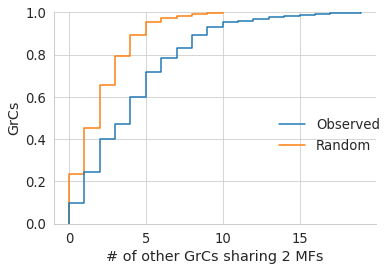

In [31]:

mpd_all = MyPlotData()
mpd_all.append(mpd_count)
mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'model', 'Random')
mpd_all.append(mpd_random)

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='top left', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_displot(
    mpd_all,
    x='count',
    hue='model',
#     kind='kde',
    kind='ecdf',
    context='paper',
#     linewidth=2.5,
#     ylim=[0, 50],
    height=4,
    width=4,
#     aspect=2,
    y_axis_label='GrCs',
    x_axis_label='# of other GrCs sharing 2 MFs',
    save_filename=f'{script_n}_observed_vs_random_cdf.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.5


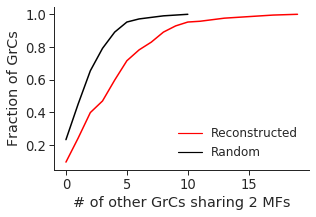

In [25]:

mpd_count_observed = mpd_count.to_histogram('count', hist_key='2shares', hist_val='count')
mpd_count_observed.add_key_value('model', 'Reconstructed')
mpd_count_observed.add_cdf('count')
mpd_all = MyPlotData()
mpd_all.append(mpd_count_observed)

mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='2shares', hist_val='count')
mpd_random.add_key_value('model', 'Random')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='top left', frameon=False, fontsize=12)

palette = {
    'Reconstructed': 'red',
    'Random': 'black',
}

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_all,
    x='2shares',
    y='count_cdf',
    hue='model',
#     kind='kde',
    kind='line',
    context='paper',
    palette=palette,
#     linewidth=2.5,
#     ylim=[0, 50],
    height=3,
    width=4.5,
#     aspect=2,
    y_axis_label='Fraction of GrCs',
    x_axis_label='# of other GrCs sharing 2 MFs',
    save_filename=f'{script_n}_observed_vs_random_cdf.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.5


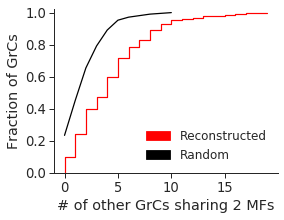

In [26]:

# mpd_count_observed = mpd_count.to_histogram('count', hist_key='2shares', hist_val='count')
# mpd_count_observed.add_key_value('model', 'Reconstructed')
# mpd_count_observed.add_cdf('count')



mpd_all = MyPlotData()
mpd_random = compress_pickle.load(
    'distribution_123share_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='2shares', hist_val='count')
mpd_random.add_key_value('model', 'Random')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

mpd_count_observed = copy.copy(mpd_count)
mpd_count_observed.add_key_value('model', 'Reconstructed')
import matplotlib.pyplot as plt
plt.subplots(figsize=(4, 3))
import seaborn as sns
ax = sns.ecdfplot(data=mpd_count_observed.to_dataframe(), x="count", palette=palette, hue='model')

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='top left', frameon=False, fontsize=12)

palette = {
    'Reconstructed': 'red',
    'Random': 'black',
}

importlib.reload(my_plot); my_plot.my_lineplot(
    mpd_all,
    x='2shares',
    y='count_cdf',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1.25,
    ylim=[0, 1.02],
    height=3,
    width=4.5,
#     aspect=2,
    y_axis_label='Fraction of GrCs',
    x_axis_label='# of other GrCs sharing 2 MFs',
    save_filename=f'{script_n}_observed_vs_random_cdf.svg',
    no_show=True,
    )

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Reconstructed')
black_patch = mpatches.Patch(color='black', label='Random')
# plt.legend(handles=[red_patch, black_patch])
plt.legend(loc='top right', frameon=False, fontsize=12, handles=[red_patch, black_patch])
# plt.legend(labels=['legendEntry1', 'legendEntry2'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(f'{script_n}_observed_vs_random_cdf.svg', bbox_inches='tight', transparent=True)
plt.show()
plt.close()



Height: 4, Aspect: 1.0


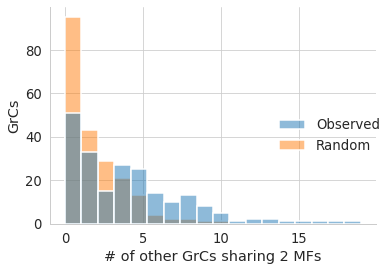

In [32]:

importlib.reload(my_plot); my_plot.my_displot(
    mpd_all,
    x='count',
    hue='model',
#     kind='kde',
#     kde=True,
#     kind='ecdf',
    context='paper',
#     linewidth=2.5,
#     ylim=[0, 50],
    height=4,
    width=4,
#     aspect=2,
    y_axis_label='GrCs',
    x_axis_label='# of other GrCs sharing 2 MFs',
    save_filename=f'{script_n}_observed_vs_random_pdf.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    )


In [37]:
from scipy.stats import kurtosis
observed = []
for i in mpd_count.data:
    observed.append(i['count'])
print(f'Observed: {kurtosis(observed)}')
random_vals = []
for i in mpd_random.data:
    random_vals.append(i['count'])
print(f'Random: {kurtosis(random_vals)}')

Observed: 2.0295161541755258
Random: 1.6217850856396945


In [39]:
import scipy.stats
scipy.stats.ranksums(observed, random_vals)

RanksumsResult(statistic=6.939172179934833, pvalue=3.944042007706307e-12)

In [40]:
len(observed)

211